In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

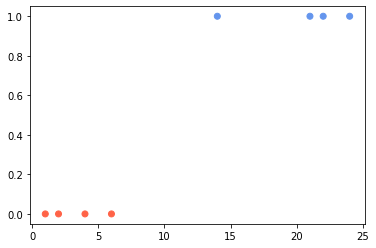

In [2]:
# Data & Visualization
x = np.array([1,2,4,6, 14,21,22,24]).reshape((-1))
y = np.array([0,0,0,0, 1,1,1,1])

colors = np.array(['tomato', 'cornflowerblue'])
plt.scatter(x,y, c=colors[y])
plt.show()

In [3]:
class LogisticRegression:
    def logit(self, z):
        return (np.e  ** z) / (1 + (np.e ** z))

    def max_likelihood(self, y, y_pred):
        return -np.sum(-y * np.log(self.logit(y_pred)) - (1-y) * np.log(1 - np.log(self.logit(y_pred))))

    def gradient_decent(self, x, y, slope_current, intercept_current, lr):
        y_pred = self.logit(slope_current * x + intercept_current)
        
        # Calculate derivative of slope, intercept
        slope_gradient = np.sum(-2 * x * (y-y_pred))
        intercept_gradient = np.sum(-2 * (y-y_pred))

        # Update values
        new_slope = slope_current - (slope_gradient * lr)
        new_intercept = intercept_current - (intercept_gradient * lr)

        return new_slope, new_intercept
    
    def fit(self, X, y, epochs=300, learning_rate=0.01, showGraph=False):
        self.X = X
        self.y = y
        colors = np.array(['tomato', 'cornflowerblue'])
        # Initial hyper parameters
        slope = 1
        intercept = 0
        
        # Keep track of parameters updates & liklelihoods
        hyper_params = np.empty((0,2))
        likelihoods = np.array([])
        
        # Run algorithm
        for i in range(epochs):
            # Update slope, intercept
            slope, intercept = self.gradient_decent(x, y, slope, intercept, learning_rate)

            # Keep track of (slope, intercept) pairs
            hyper_params = np.concatenate((hyper_params, np.array((slope, intercept)).reshape(-1,2)))

            # Keep track of liklihoods
            straight_line = slope * x + intercept
            likelihood = self.max_likelihood(y, self.logit(straight_line))
            likelihoods = np.append(likelihoods, likelihood)

            if showGraph and ((i) % 50 == 0 or i == epochs-1):
                logit_y = self.logit(straight_line)
                plt.scatter(x, y, c=colors[y])
                plt.plot(x, logit_y)
                plt.title(f"Epoch: {i} | Likelihood: {'{0:.4f}'.format(likelihood)}")
                plt.show()
        
        if showGraph:
            # Show objective function (maximum likelihood)
            plt.plot(np.arange(1,101), likelihoods[:100])
            plt.xlabel("Epoch")
            plt.ylabel("Likelihood")
            plt.title("Objective Function: Maximum Likelihood")
            plt.show()
                          
        self.slope, self.intercept = hyper_params[likelihoods.argmax()]
        return self
        
    def predict_proba(self, sample):
        probability = self.logit(self.slope * sample + self.intercept)
        return probability
                          
    def score(self, y_true, y_pred):
                          
        return np.count_nonzero((np.round(y_pred) == y_true)) / y_true.shape[0] * 100

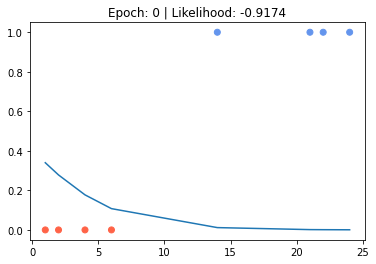

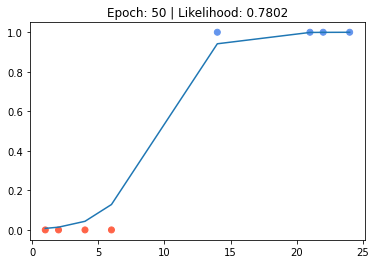

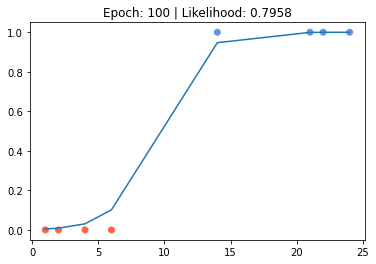

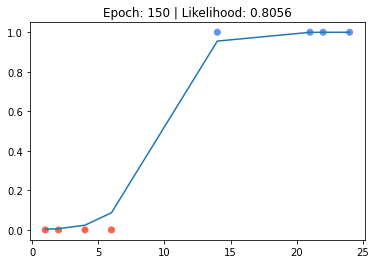

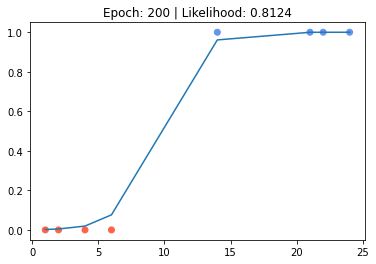

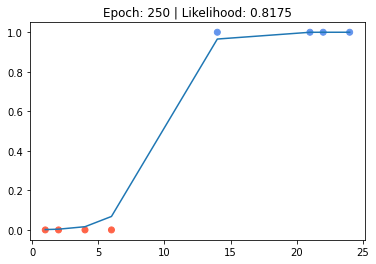

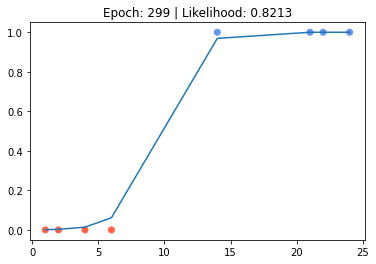

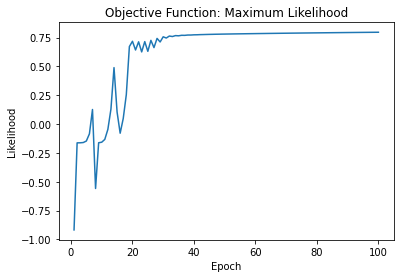

In [4]:
# Fit model to data
epochs = 300
learning_rate = 0.052
lg = LogisticRegression()
lg.fit(x, y, epochs, learning_rate, True)

In [5]:
# Training accuracy
y_pred = lg.predict_proba(x)
accuracy = lg.score(y, y_pred)
print(f"Training Accuracy = {accuracy}%")

Training Accuracy = 100.0%
